<a href="https://colab.research.google.com/github/DeepRoy105/AI-ML-projects/blob/main/stock_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
# For reading stock data from yahoo
!pip install --upgrade pandas_datareader
from pandas_datareader.data import DataReader
!pip install --upgrade yfinance
import yfinance as yf
from pandas_datareader import data as pdr
# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price      Close High  Low Open Volume company_name Close High  Low Open  ...  \
Ticker      AAPL AAPL AAPL AAPL   AAPL               GOOG GOOG GOOG GOOG  ...   
Date                                                                      ...   
2025-01-10   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-01-13   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-01-14   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-01-15   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-01-16   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-01-17   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-01-21   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-01-22   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-01-23   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-01-24   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   

Price      Close High  Low Open Volume       Close        High         Low  \
Ticker      MSFT MSFT MSFT MSFT   MSFT        AMZN        AMZN        AMZN   
Date                                                                         
2025-01-10   NaN  NaN  NaN  NaN    NaN  218.940002  221.710007  216.500000   
2025-01-13   NaN  NaN  NaN  NaN    NaN  218.460007  219.399994  216.470001   
2025-01-14   NaN  NaN  NaN  NaN    NaN  217.759995  221.820007  216.199997   
2025-01-15   NaN  NaN  NaN  NaN    NaN  223.350006  223.570007  220.750000   
2025-01-16   NaN  NaN  NaN  NaN    NaN  220.660004  224.649994  220.309998   
2025-01-17   NaN  NaN  NaN  NaN    NaN  225.940002  226.509995  223.080002   
2025-01-21   NaN  NaN  NaN  NaN    NaN  230.710007  231.779999  226.940002   
2025-01-22   NaN  NaN  NaN  NaN    NaN  235.009995  235.440002  231.190002   
2025-01-23   NaN  NaN  NaN  NaN    NaN  235.419998  235.520004  231.509995   
2025-01-24   NaN  NaN  NaN  NaN    NaN  234.850006  236.399994  232.929993   

Price             Open      Volume  
Ticker            AMZN        AMZN  
Date                                
2025-01-10  221.460007  36811500.0  
2025-01-13  218.059998  27262700.0  
2025-01-14  220.440002  24711700.0  
2025-01-15  222.830002  31291300.0  
2025-01-16  224.419998  24757300.0  
2025-01-17  225.839996  42370100.0  
2025-01-21  228.899994  39951500.0  
2025-01-22  232.020004  41448200.0  
2025-01-23  234.100006  26404400.0  
2025-01-24  234.500000  25874200.0  

[10 rows x 21 columns]

In [3]:
AAPL.describe()

Price        Close        High         Low        Open        Volume
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL
count   251.000000  251.000000  251.000000  251.000000  2.510000e+02
mean    209.720566  211.528665  207.712586  209.577297  5.694885e+07
std      25.982777   26.075968   25.608693   25.869484  3.097961e+07
min     164.405121  165.800067  163.488440  164.753849  2.323470e+07
25%     184.658409  186.256828  182.886129  185.061146  4.123235e+07
50%     219.868103  221.536270  216.640614  218.769299  4.970930e+07
75%     228.269997  229.925303  226.269591  228.426350  6.262950e+07
max     259.019989  260.100006  257.630005  258.190002  3.186799e+08

In [4]:
GOOG.describe()

Price        Close        High         Low        Open        Volume
Ticker        GOOG        GOOG        GOOG        GOOG          GOOG
count   251.000000  251.000000  251.000000  251.000000  2.510000e+02
mean    168.134733  169.845102  166.477699  168.083519  1.955270e+07
std      16.118672   16.334850   15.945912   16.073491  8.369299e+06
min     132.085403  133.540172  131.079014  132.264756  6.809800e+06
25%     157.384491  158.945028  155.645751  157.085121  1.431935e+07
50%     167.988037  169.357872  165.753529  168.327214  1.723610e+07
75%     177.877357  179.285808  176.102664  177.937216  2.152790e+07
max     201.899994  203.839996  199.783997  200.550003  5.972800e+07

In [5]:
df.describe()

Price        Close        High         Low        Open        Volume  \
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL   
count   251.000000  251.000000  251.000000  251.000000  2.510000e+02   
mean    209.720566  211.528665  207.712586  209.577297  5.694885e+07   
std      25.982777   26.075968   25.608693   25.869484  3.097961e+07   
min     164.405121  165.800067  163.488440  164.753849  2.323470e+07   
25%     184.658409  186.256828  182.886129  185.061146  4.123235e+07   
50%     219.868103  221.536270  216.640614  218.769299  4.970930e+07   
75%     228.269997  229.925303  226.269591  228.426350  6.262950e+07   
max     259.019989  260.100006  257.630005  258.190002  3.186799e+08   

Price        Close        High         Low        Open        Volume  \
Ticker        GOOG        GOOG        GOOG        GOOG          GOOG   
count   251.000000  251.000000  251.000000  251.000000  2.510000e+02   
mean    168.134733  169.845102  166.477699  168.083519  1.955270e+07   
std      16.118672   16.334850   15.945912   16.073491  8.369299e+06   
min     132.085403  133.540172  131.079014  132.264756  6.809800e+06   
25%     157.384491  158.945028  155.645751  157.085121  1.431935e+07   
50%     167.988037  169.357872  165.753529  168.327214  1.723610e+07   
75%     177.877357  179.285808  176.102664  177.937216  2.152790e+07   
max     201.899994  203.839996  199.783997  200.550003  5.972800e+07   

Price        Close        High         Low        Open        Volume  \
Ticker        MSFT        MSFT        MSFT        MSFT          MSFT   
count   251.000000  251.000000  251.000000  251.000000  2.510000e+02   
mean    421.632164  425.022862  418.011496  421.796580  2.030056e+07   
std      15.405374   15.149279   15.257498   15.099210  7.386270e+06   
min     387.154846  397.655896  384.117387  387.693796  7.164500e+06   
25%     411.329102  414.420489  407.309713  411.053460  1.609405e+07   
50%     419.294281  423.580211  415.877548  419.642344  1.838930e+07   
75%     429.235199  432.279740  425.554907  429.971091  2.195200e+07   
max     465.786438  466.573450  462.698189  465.228569  6.426370e+07   

Price        Close        High         Low        Open        Volume  
Ticker        AMZN        AMZN        AMZN        AMZN          AMZN  
count   251.000000  251.000000  251.000000  251.000000  2.510000e+02  
mean    189.124303  191.017052  187.018884  189.144781  4.014813e+07  
std      17.798796   17.903530   17.664089   17.838000  1.642797e+07  
min     155.199997  158.509995  151.610001  154.210007  1.500750e+07  
25%     177.739998  179.004997  175.704994  177.595001  3.013855e+07  
50%     185.000000  186.720001  183.350006  184.899994  3.633490e+07  
75%     196.449997  199.055000  194.014999  196.244995  4.367220e+07  
max     235.419998  236.399994  232.929993  234.500000  1.414484e+08

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2024-01-25 to 2025-01-24
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     251 non-null    float64
 1   (High, AAPL)      251 non-null    float64
 2   (Low, AAPL)       251 non-null    float64
 3   (Open, AAPL)      251 non-null    float64
 4   (Volume, AAPL)    251 non-null    float64
 5   (company_name, )  1004 non-null   object 
 6   (Close, GOOG)     251 non-null    float64
 7   (High, GOOG)      251 non-null    float64
 8   (Low, GOOG)       251 non-null    float64
 9   (Open, GOOG)      251 non-null    float64
 10  (Volume, GOOG)    251 non-null    float64
 11  (Close, MSFT)     251 non-null    float64
 12  (High, MSFT)      251 non-null    float64
 13  (Low, MSFT)       251 non-null    float64
 14  (Open, MSFT)      251 non-null    float64
 15  (Volume, MSFT)    251 non-null    float64
 16  (Close, AMZN)     251 no

# **Closing Price**
*The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.*

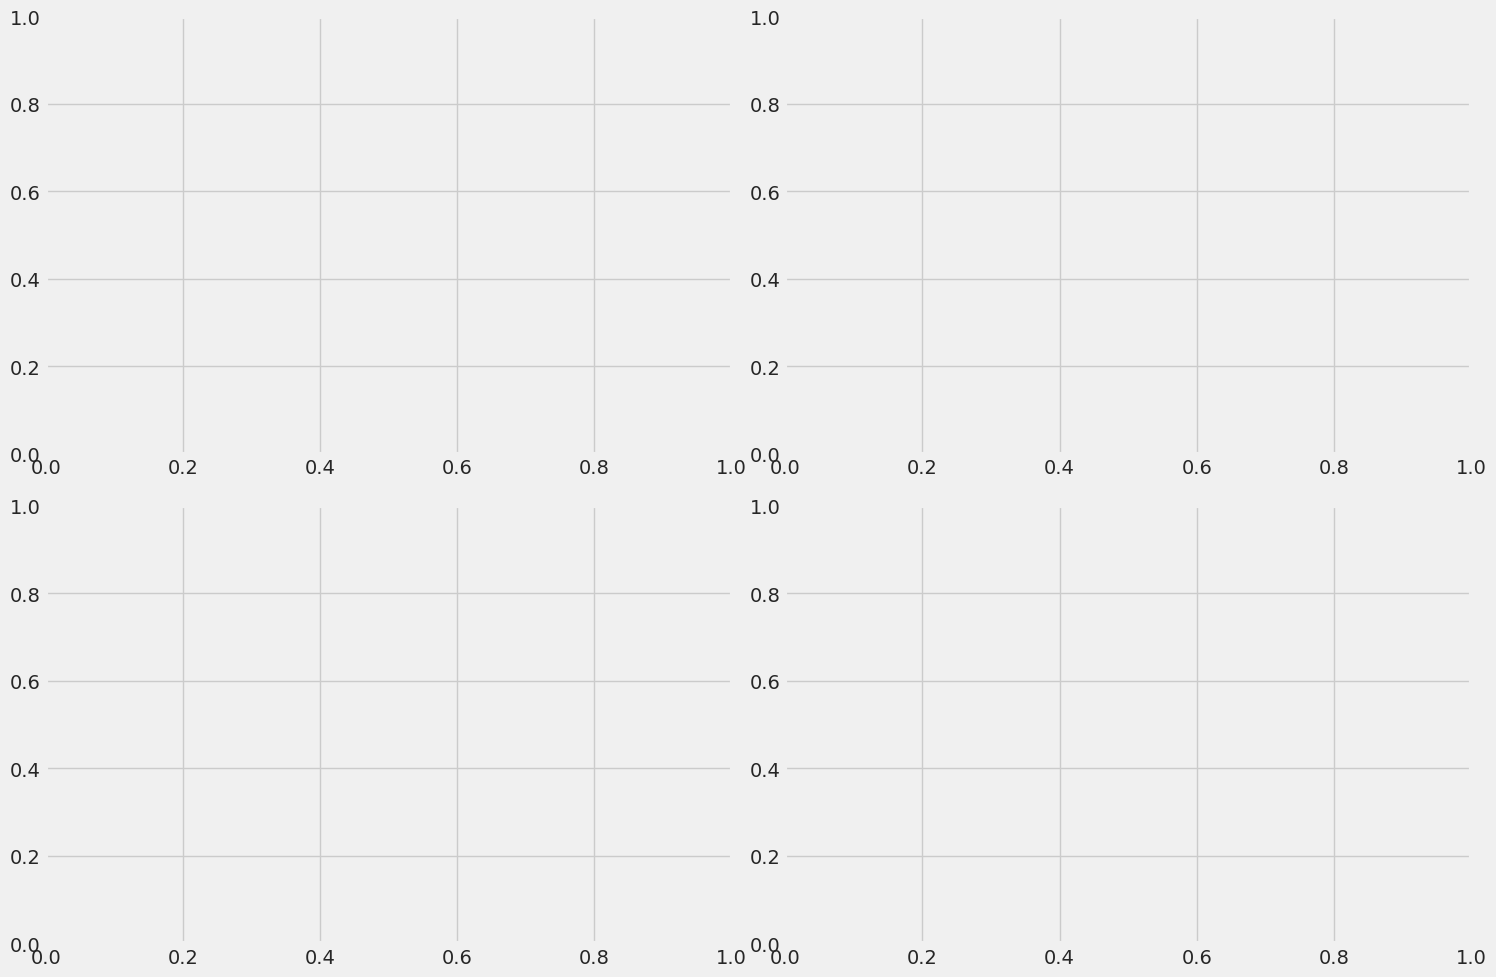

In [7]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    if 'Adj close' in company.columns:
        company['Adj close'].plot()
        plt.ylabel('Adj Close')
        plt.xlabel(None)
        plt.title(f"Closing Price of {tech_list[i - 1]}")
    else:
        print(f"Warning: 'Adj close' column missing for {tech_list[i - 1]}")

plt.tight_layout()
plt.show()


# Volume of Sales
***Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.***

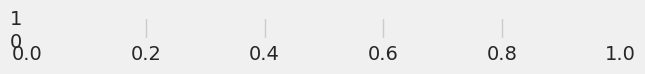

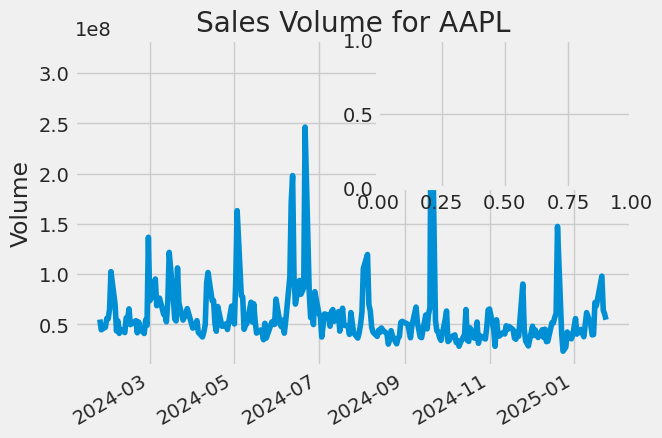

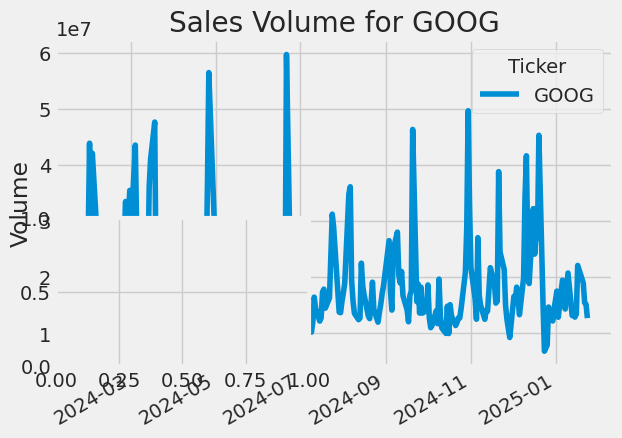

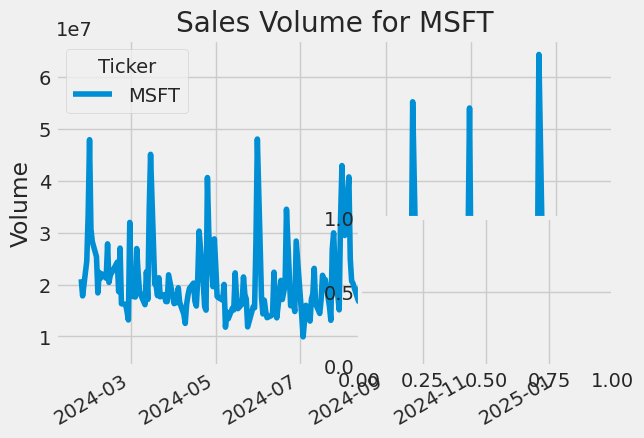

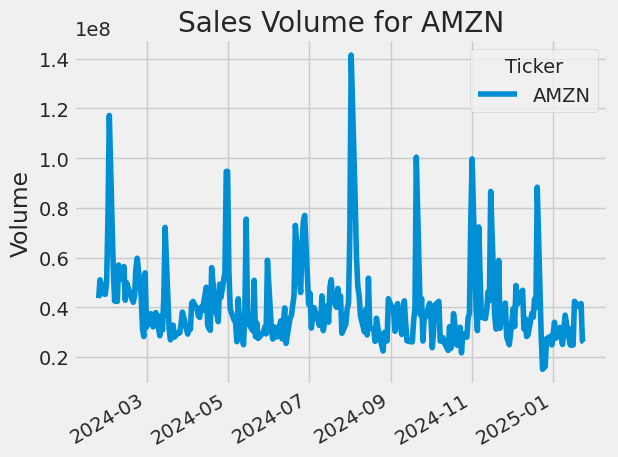

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

# What was the correlation between different stocks closing prices?
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor.


In [9]:
# Grab all the closing prices for the tech stock list into one DataFrame

# Downloading the data for the tech list
closing_data = yf.download(tech_list, start=start, end=end)
# Getting the adjusted close prices
closing_df = closing_data['Close']

# Make a new tech returns DataFrame
tech_rets = closing_data.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Price          Close                                    High            \
Ticker          AAPL      AMZN      GOOG      MSFT      AAPL      AMZN   
Date                                                                     
2024-01-25       NaN       NaN       NaN       NaN       NaN       NaN   
2024-01-26 -0.009013  0.008685  0.000976 -0.002322 -0.007694  0.013942   
2024-01-29 -0.003586  0.013449  0.006828  0.014334 -0.013144  0.003546   
2024-01-30 -0.019246 -0.014015 -0.011560 -0.002758 -0.002081  0.002728   
2024-01-31 -0.019358 -0.023899 -0.073505 -0.026946 -0.024505 -0.016818   

Price                                Low                                \
Ticker          GOOG      MSFT      AAPL      AMZN      GOOG      MSFT   
Date                                                                     
2024-01-25       NaN       NaN       NaN       NaN       NaN       NaN   
2024-01-26 -0.004200 -0.002064 -0.006059  0.021741  0.010448 -0.000248   
2024-01-29  0.007073  0.009380 -0.012296  0.006269  0.000785  0.004721   
2024-01-30 -0.001031  0.007488 -0.011130 -0.002580 -0.000948  0.005243   
2024-01-31 -0.060952  0.005496 -0.016643 -0.023219 -0.073474 -0.022733   

Price           Open                                  Volume            \
Ticker          AAPL      AMZN      GOOG      MSFT      AAPL      AMZN   
Date                                                                     
2024-01-25       NaN       NaN       NaN       NaN       NaN       NaN   
2024-01-26 -0.004866  0.009366  0.007447  0.000124 -0.186569  0.169776   
2024-01-29 -0.011633  0.005807  0.005037  0.004179  0.057218 -0.113169   
2024-01-30 -0.005573  0.008535  0.002408  0.015269  0.184827 -0.001392   
2024-01-31 -0.020425 -0.023024 -0.055970 -0.012856 -0.007010  0.112305   

Price                           
Ticker          GOOG      MSFT  
Date                            
2024-01-25       NaN       NaN  
2024-01-26 -0.093072 -0.153079  
2024-01-29  0.072574  0.376722  
2024-01-30  0.271152  0.365864  
2024-01-31  0.652010  0.429944

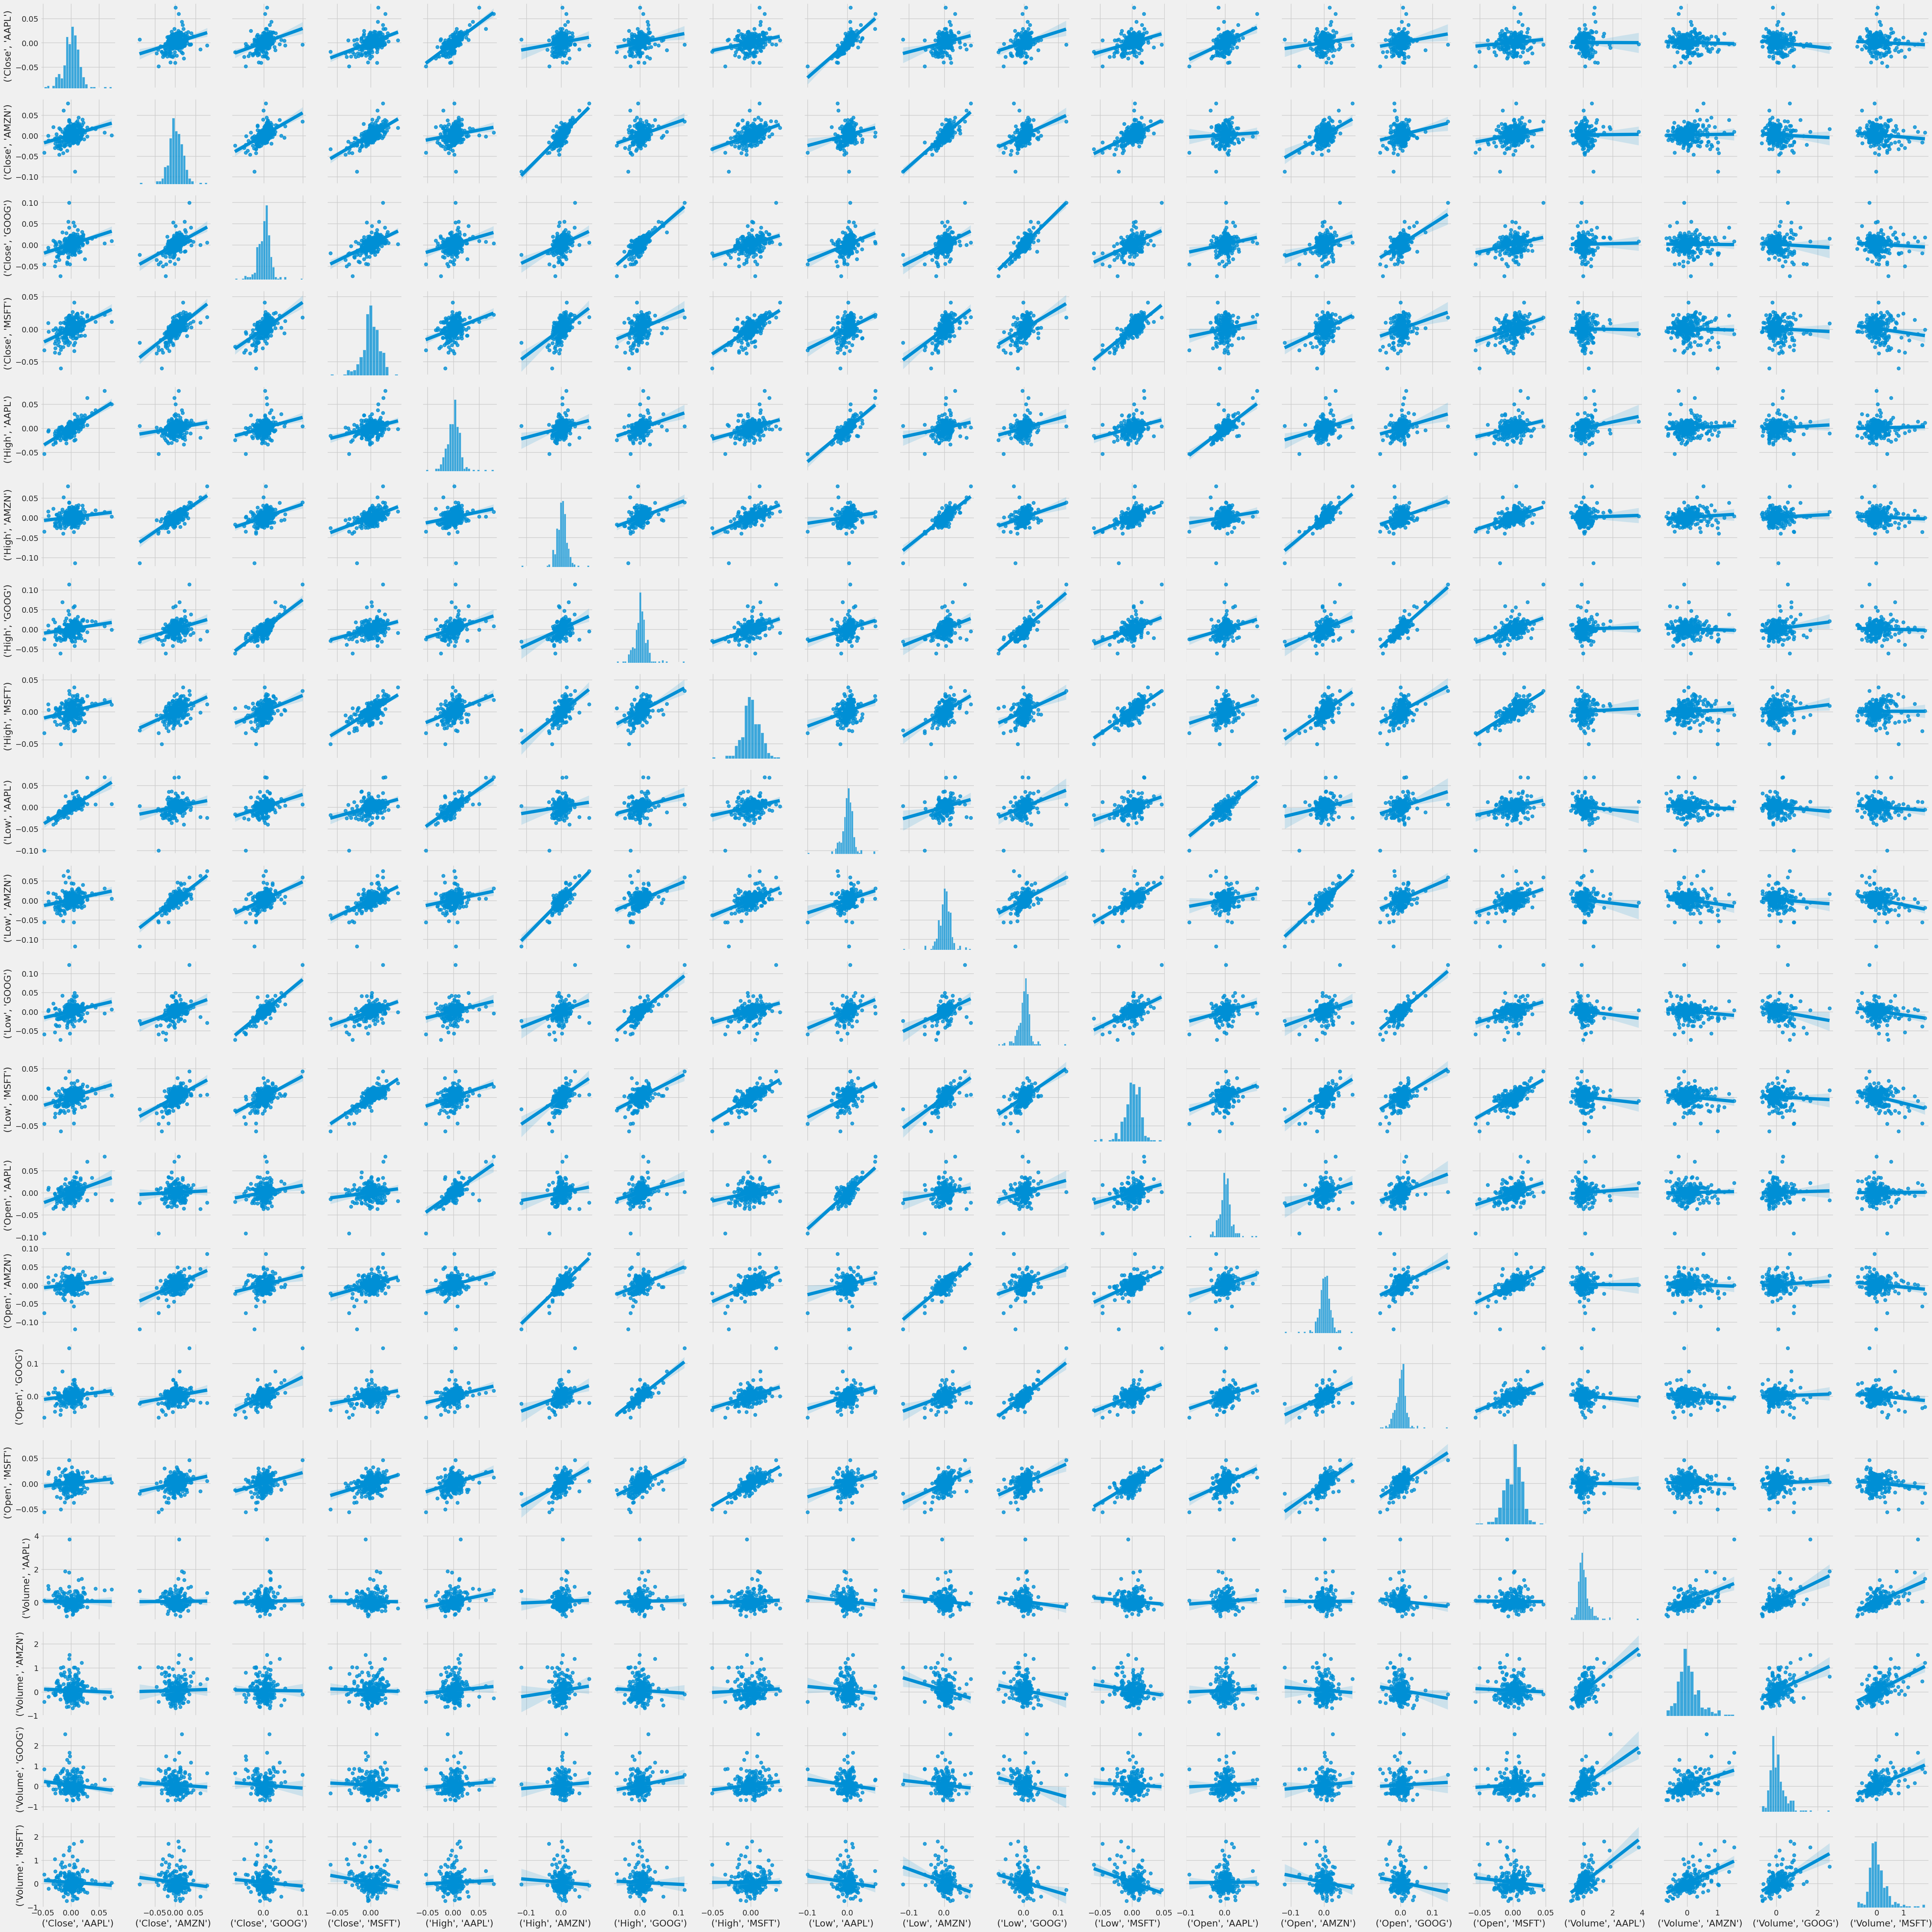

In [10]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

# Predicting the closing price stock price of APPLE inc

In [11]:
# Get the stock quote
df = yf.download('AMZN', start='2012-01-01', end=datetime.now().strftime('%Y-%m-%d'))
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            AMZN        AMZN        AMZN        AMZN       AMZN
Date                                                                 
2012-01-03    8.951500    8.974000    8.777500    8.794500  102216000
2012-01-04    8.875500    9.025000    8.803500    8.960500   84104000
2012-01-05    8.880500    8.912500    8.702500    8.797000   76182000
2012-01-06    9.130500    9.232500    8.875000    8.903500  140168000
2012-01-09    8.928000    9.218500    8.850000    9.138000  101138000
...                ...         ...         ...         ...        ...
2025-01-17  225.940002  226.509995  223.080002  225.839996   42370100
2025-01-21  230.710007  231.779999  226.940002  228.899994   39951500
2025-01-22  235.009995  235.440002  231.190002  232.020004   41448200
2025-01-23  235.419998  235.520004  231.509995  234.100006   26404400
2025-01-24  234.850006  236.399994  232.929993  234.500000   25874200

[3285 rows x 5 columns]

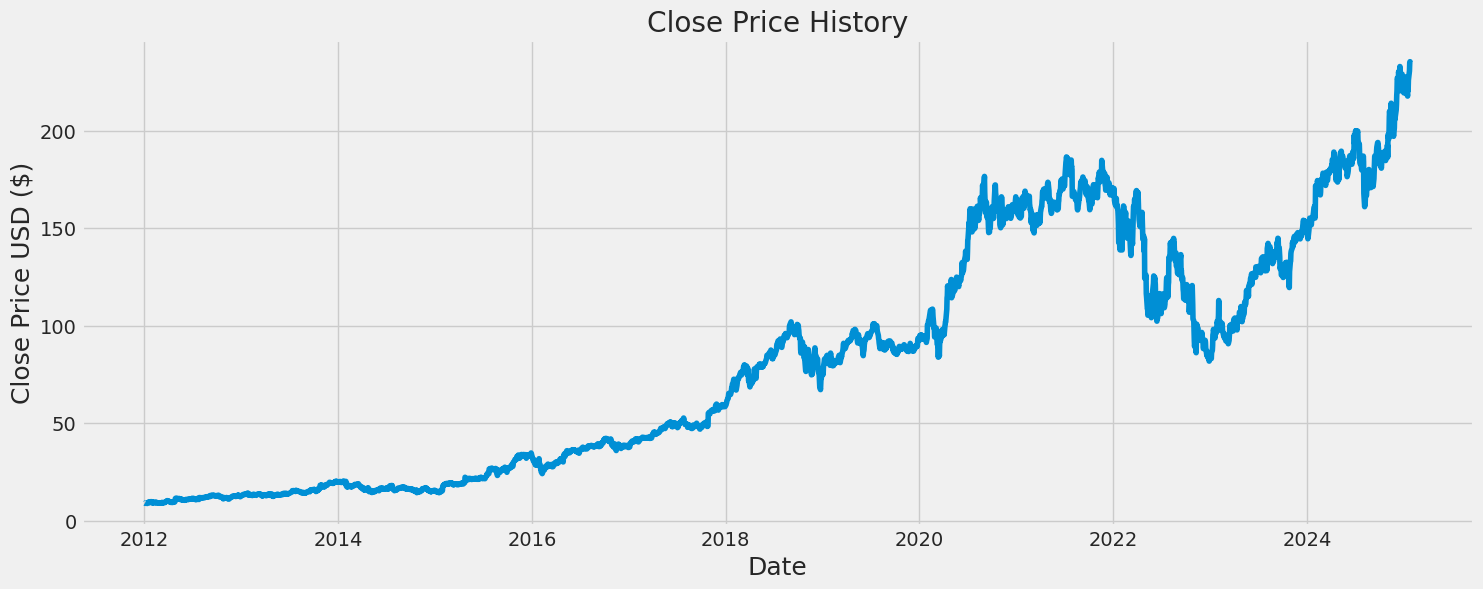

In [12]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [15]:
# Create a new dataframe with only the 'Close column
data = df[['Close']]  # Use double brackets to select the column as a DataFrame
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [16]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[6.83952610e-04],
       [3.48593681e-04],
       [3.70657211e-04],
       ...,
       [9.98190816e-01],
       [1.00000000e+00],
       [9.97484850e-01]])

In [17]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00068395, 0.00034859, 0.00037066, 0.00147381, 0.00058026,
       0.00075235, 0.00065527, 0.        , 0.00054937, 0.00126421,
       0.00298071, 0.00408607, 0.00330945, 0.0022416 , 0.00244238,
       0.00261888, 0.00383676, 0.00428905, 0.00357862, 0.00408387,
       0.00077882, 0.00127745, 0.0025924 , 0.00159074, 0.00182241,
       0.00210702, 0.0019967 , 0.00212026, 0.00345507, 0.00339108,
       0.00188418, 0.00088252, 0.00144954, 0.00139659, 0.00102593,
       0.00065306, 0.00070602, 0.00057364, 0.00173636, 0.00082957,
       0.00090679, 0.00074352, 0.00095533, 0.00113845, 0.00172974,
       0.00258358, 0.00185109, 0.0016459 , 0.00191066, 0.00139659,
       0.00187536, 0.00201215, 0.00211584, 0.00361833, 0.00348596,
       0.00363378, 0.00421624, 0.00594378, 0.0065108 , 0.0055665 ])]
[0.006327675762436688]

[array([0.00068395, 0.00034859, 0.00037066, 0.00147381, 0.00058026,
       0.00075235, 0.00065527, 0.        , 0.00054937, 0.00126421,
       0.00298071, 0.00408607, 0.0

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3061/3061 ━━━━━━━━━━━━━━━━━━━━ 150s 48ms/step - loss: 0.0024


In [20]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3061/3061 ━━━━━━━━━━━━━━━━━━━━ 152s 49ms/step - loss: 0.0017


In [21]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step


<ipython-input-22-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


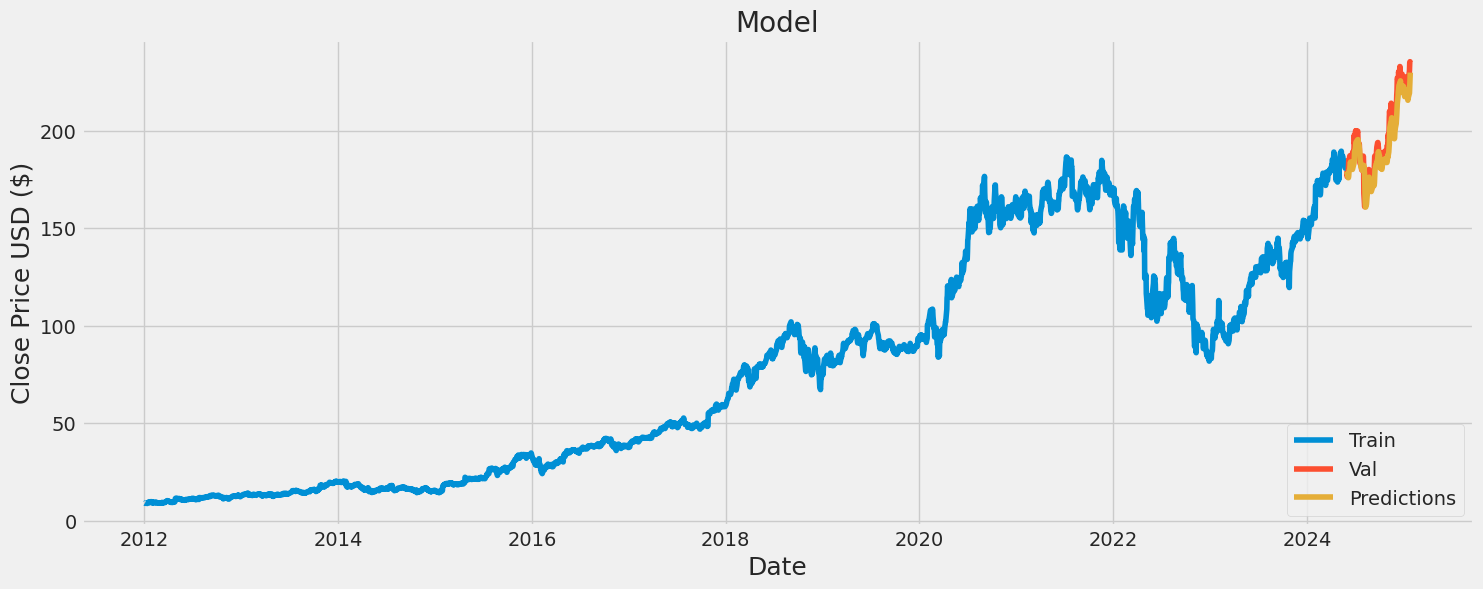

In [22]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
# Show the valid and predicted prices
valid

Price            Close Predictions
Ticker            AMZN            
Date                              
2024-05-30  179.320007  179.081848
2024-05-31  176.440002  178.414413
2024-06-03  178.339996  176.773041
2024-06-04  179.339996  175.918198
2024-06-05  181.279999  175.902679
...                ...         ...
2025-01-17  225.940002  217.281326
2025-01-21  230.710007  219.360397
2025-01-22  235.009995  222.758072
2025-01-23  235.419998  226.835709
2025-01-24  234.850006  229.812012

[164 rows x 2 columns]